In [1]:
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import numpy as np

In [2]:
from matplotlib import animation, rc
from IPython.display import HTML

In [32]:
class soldier:
    def __init__(self, side:int, initial_pos:list, strength:int):
        self.side = side
        self.pos = initial_pos
        self.strength = strength
        self.health = 100
        self.firepower = 10
        self.range = 20
        self.accuracy = 0.75
        self.movement_speed = 1
        self.alive = True
        self.vision = 2

    def move(self):
        # Example of a simple random movement
        if self.side:
            self.pos[0] -= np.random.uniform(0, self.movement_speed)
        else:
            self.pos[0] += np.random.uniform(0, self.movement_speed)
        self.pos[1] += np.random.uniform(-self.movement_speed*0.3, self.movement_speed*0.3)

    def attack(self, target):
        distance = np.linalg.norm(np.array(self.pos) - np.array(target.pos))
        if distance <= self.range and np.random.rand() < self.accuracy:
            target.take_damage(self.firepower)

    def take_damage(self, amount):
        self.health -= amount
        if self.health <= 0:
            # Handle soldier death (remove from simulation, etc.)
            pass
    
    def body_to_body_fight(self,nearby_opponents):
        if nearby_opponents: 
            target = min(nearby_opponents, key=lambda opp: np.linalg.norm(np.array(self.pos) - np.array(opp.pos)))

            fight_outcome = np.random.uniform()
            if self.strength / (self.strength + target.strength) <= fight_outcome:
                self.alive = False
            else:
                target.alive = False


In [34]:
imgs = []
A,B = [],[]
qtySoldiers = 500
qAt, qBt = [qtySoldiers],[qtySoldiers]


for i in range(qtySoldiers):
    A.append(soldier(0,[-50+np.random.uniform(-2,2),np.random.uniform(-50,50)],np.random.randint(1,10)))
    B.append(soldier(1,[50+np.random.uniform(-2,2),np.random.uniform(-50,50)],np.random.randint(1,10)))

fig,ax = plt.subplots(1,1,figsize=(7,7),dpi=85)

ax.set_ylim(-60,60)
ax.set_xlim(-60,60)
ax.set_axis_off()

positions = {'x':[],'y':[]}
colors = []

for s in A+B:
    positions['x'].append(s.pos[0])
    positions['y'].append(s.pos[1])
    colors.append('r' if s.side else 'b')

im = ax.scatter(positions['x'],positions['y'],c=colors)

ax.set_title('Campo de Batalla, combate cuerpo a cuerpo')

imgs.append([im])

for i in range(100):
    positions = {'x':[],'y':[]}

    for s in A+B:
        s.move()
    
    for a in A:
            nearby_opponents = []
            for b in B:
                if a.side != b.side: 
                    distance = np.linalg.norm(np.array(a.pos) - np.array(b.pos))
                    if distance <= 2:  
                        nearby_opponents.append(b) 
            if nearby_opponents:
                a.body_to_body_fight(nearby_opponents)
    
    A = [soldier for soldier in A if soldier.alive]
    B = [soldier for soldier in B if soldier.alive]
    qAt.append(len(A))
    qBt.append(len(B))

    positions['x'] = [s.pos[0] for s in A+B]
    positions['y'] = [s.pos[1] for s in A+B]
    colors = ['r' if s.side else 'b' for s in A+B]

    imgs.append([ax.scatter(positions['x'],positions['y'],c=colors)])
    
plt.close()

In [35]:
anim = animation.ArtistAnimation(fig, imgs, interval=20, blit=True,repeat_delay=0)

In [36]:
rc('animation', html='jshtml')
HTML(anim.to_jshtml())

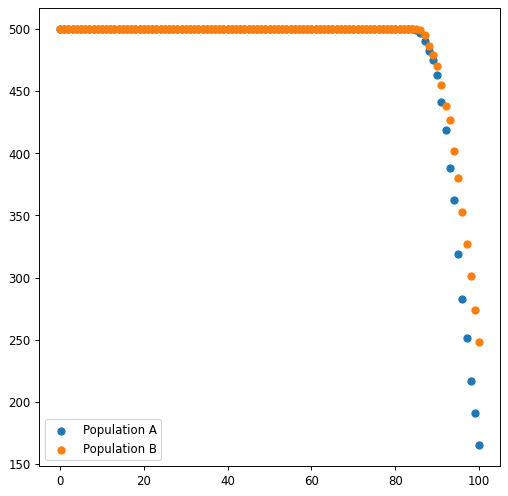

In [40]:
fig,ax = plt.subplots(1,1,figsize=(7,7),dpi=85)

ax.scatter(np.arange(len(qAt)),qAt,label='Population A')
ax.scatter(np.arange(len(qBt)),qBt,label='Population B')

ax.legend()
plt.show()